# Regarding the final project for the class

You will not have more assignements from now, you will only need to work on your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using codes from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

Afternoon sessions will be used to solve project issues.

## RENIELLE CH. 


### This proyect is divided into two parts
#### A. The Fashion MNIST   
 1. Extracting, exploring
 2. SVM Algorith
 3. Acurracy and charts
 4. Pickle
 
#### B. Prediction in Logos   
 1. Extracting, exploring & transforming
 2. SVM Algorith
 3. Acurracy and charts
 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from PIL import Image
from io import StringIO
import urllib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.io import imread, imshow
import skimage.color as color
import skimage.io as io
import cv2
import csv
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import numpy as np

# A.FASHION
A standard dataset used in computer vision and deep learning. 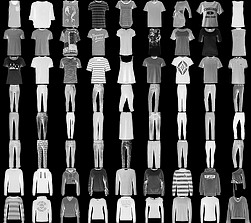

In [63]:
#Making a legend of the cloth
listKey= {
0: r'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}


def getLegendN(num):
    return listKey.get(num)

## 1. Extract and Exploring Data
I have notice that I can go straight to obtaining data train and test. I do have more observations below.

In [5]:
#Fashion
import tensorflow as tf

(x_train6, y_train6), (x_test6, y_test6) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train 60K shape:", x_train6.shape, "y_train 60K shape:", y_train6.shape)

x_train 60K shape: (60000, 28, 28) y_train 60K shape: (60000,)


In [6]:
print(y_train6)
print(y_train6.size)

[9 0 0 ... 3 0 5]
60000


## Transform   
The dataset already comes clean. If it where not, I would of done the following:   
* Turn grayscale
* Resize to same shape
* Turn into an array each picture (This I have done)

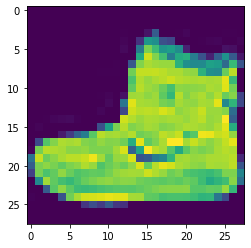

In [195]:
plt.imshow(x_train6[0])

In [196]:
x_train6.shape

(60000, 28, 28)

#### 1. Did the entire progress. Did not work. It was too heavy.

#### stepback!
This did not work(over 12hr processing). The dataset is too big. I will make an even smaller sample(3000), I have not chosen the first 3000 because it is organize by sets.   
Also, I will be selecting an aditional sample of the second dataset to get train and test data out of the 3000

## 2.  Sampling, sampling, sampling

In [8]:
k=3000
listSample=random.sample(range(len(x_train6)), k)

In [9]:
#Reshape to 2 Dimension
n_sample=len(x_train6)
data_train = x_train6.reshape((n_sample, -1))
print(np.shape(data_train))

(60000, 784)


In [10]:
listoutArr=[]#Images in Array
listoutImg=[]#Normal Images

#Reshape to 2 Dimension
#3000 samples, 784 pixels (flattened )

n_sample=len(x_train6)
x_array=x_train6.reshape((n_sample, -1))
print(np.shape(x_array))
for i in listSample:
    Arr=x_array[i]
    #print(Img)
    Img=x_train6[i]
    classif=y_train6[i]
    listoutArr.append([Arr,classif])
    listoutImg.append([Img,classif])

print("Imagen en pixels:",np.shape(listoutImg))
print("Imagen en Array:",np.shape(listoutArr))


(60000, 784)
Imagen en pixels: (3000, 2)
Imagen en Array: (3000, 2)


In [11]:
print(listoutImg[1])
print(listoutArr[1])

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 

In [12]:
#Did we get a balance dataset?

#Arrays
df_smallA=pd.DataFrame(listoutArr, columns=['image','classif'])
df_info=df_smallA.groupby('classif').count()
df_info.reset_index(inplace=True)
df_info.rename(columns={'image':'count'}, inplace=True)
df_info['percentage']= round((df_info['count']*100)/k,2)#, axis=1)
print(df_info)
print('Sum of the porcentage: '+str(df_info.percentage.sum()))

   classif  count  percentage
0        0    297        9.90
1        1    296        9.87
2        2    320       10.67
3        3    315       10.50
4        4    333       11.10
5        5    280        9.33
6        6    306       10.20
7        7    284        9.47
8        8    296        9.87
9        9    273        9.10
Sum of the porcentage: 100.00999999999999


In [13]:

#Images 2D
df_smallI=pd.DataFrame(listoutImg, columns=['image','classif'])
df_infoI=df_smallI.groupby('classif').count()
df_infoI.reset_index(inplace=True)
df_infoI.rename(columns={'image':'count'}, inplace=True)
df_infoI['percentage']= round((df_info['count']*100)/k,2)#, axis=1)
print(df_infoI)
print('Sum of the porcentage: '+str(df_infoI.percentage.sum()))


   classif  count  percentage
0        0    297        9.90
1        1    296        9.87
2        2    320       10.67
3        3    315       10.50
4        4    333       11.10
5        5    280        9.33
6        6    306       10.20
7        7    284        9.47
8        8    296        9.87
9        9    273        9.10
Sum of the porcentage: 100.00999999999999


This is much better. 
Now to get a smaller sample for train and test

In [14]:

x=list(df_smallA['image'])
y=list(df_smallA['classif'])

print("Information Array\n")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train size: '+str(len(y_train)))
print('Test size: '+str(len(y_test)))

'''x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train size: '+str(len(y_train)))
print('Test size: '+str(len(y_test)))
'''

Information Array

Train size: 2400
Test size: 600


"x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\nprint('Train size: '+str(len(y_train)))\nprint('Test size: '+str(len(y_test)))\n"

In [15]:
xI=list(df_smallI['image'])
yI=list(df_smallI['classif'])

print("Information Image\n")
x_trainI, x_testI, y_trainI, y_testI = train_test_split(xI, yI, test_size=0.2, random_state=42)
print('Train size: '+str(len(y_trainI)))
print('Test size: '+str(len(y_testI)))

Information Image

Train size: 2400
Test size: 600


"x_trainI, x_testI, y_trainI, y_testI = train_test_split(xI, yI, test_size=0.2, random_state=42)\nprint('Train size: '+str(len(y_trainI)))\nprint('Test size: '+str(len(y_testI)))\n"

Am I getting the sample sample?

In [16]:
y_test==y_testI

True

We are!

At this point we SHOULD put this into a CSV

In [205]:
#CSV  Write of the images

out=[]
with open('/home/rectapia/Desktop/gitprofe/bts-mbds-data-science-foundations-2019/Project/Fashion/FashionClean.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',',quoting=csv.QUOTE_NONE,escapechar=' ')
    for i in range(len(x_train)) :
        item1 = (x_train[i])
        item2 = (y_train[i])
        out.append([item1,item2])
        #print(str(out[i]))
        writer.writerow(str(out[i])+'\n')#out[i])

    ... and READ it from the CSV (Skiping it)


### MODEL SVM


Create a classifier: a support vector classifier: SVM aim at solving classification problems by finding good
decision boundaries sets of points belonging to different categories. A decision boundary can
be thought of as a line or surface separating your training data into spaces corresponding to categories.    
SVM is particularly well suited for classification of complex but small- or medium-sized datasets.


In [17]:
#What do we have
print(x_train[:1])
print(y_train[:1])

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52,
       255, 252, 253, 253, 251, 241, 254,  71,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 111, 230, 214, 219, 221, 218, 215, 233, 134,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 142, 239, 209, 223, 221, 213, 211, 233, 156,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 155, 236, 212, 224, 224, 216, 214, 234,
       162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 175, 233, 212, 223, 226, 216,
       213, 232, 171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 231, 2

In [18]:
#Please GOD
#Fitting the model
y_train=np.array(y_train)#.to_numpy()#converting to array
x_train=np.array(x_train)#.to_numpy()#Converting to array
print(len(y_train))
print(len(x_train))
model_svm = svm.SVC(kernel='linear', C=1.0, random_state=0)
model_svm.fit(x_train, y_train)

2400
2400


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Model SVM done!

In [19]:
#Predict the values with test data
expected = y_test
predicted = model_svm.predict(x_test)


## 3.Show Results
#How did we do?

In [20]:

aScoreSVM1=accuracy_score(y_test, predicted)
print('Accuracy of Model SVM1:',aScoreSVM1)
#Not too bad!

Accuracy of Model SVM1: 0.8083333333333333


In [21]:
(y_test!=predicted).any()

True

### Validate SVM Fashion

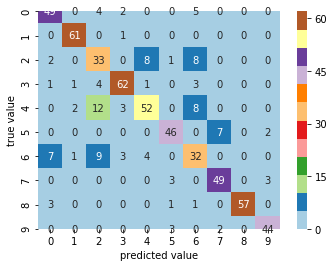

In [22]:
#Confusion Matrix. 

mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat, square=True, annot=True, cbar=True, cmap="Paired")
plt.xlabel('predicted value')
plt.ylabel('true value');



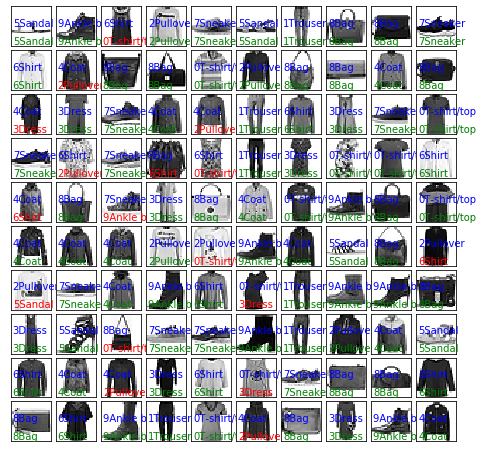

In [23]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

#test_images = x_testI.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_testI[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.5, str(y_test[i])+getLegendN(y_test[i]), transform=ax.transAxes,color='blue')
    ax.text(0.05, 0.05, str(predicted[i])+getLegendN(predicted[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == predicted[i]) else 'red')


In [24]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(x)
projection.shape


(3000, 2)

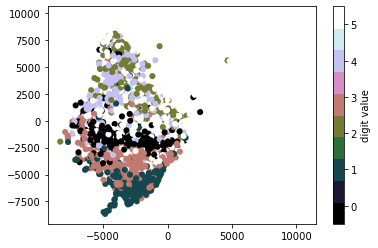

In [25]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=y, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 5.5)

## 4. Packaging Model

In [28]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
#X, y = iris.data, iris.target
clf.fit(x, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
import pickle
filename = "final_model.pkl"
pickle.dump(clf, open(filename, 'wb'))

In [30]:
clf2 = pickle.load(open(filename, 'rb'))

In [31]:
clf2.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [32]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
clf2.predict(x_test[0:50])

array([5, 9, 3, 2, 7, 5, 1, 8, 8, 7, 6, 4, 8, 8, 0, 2, 8, 8, 4, 8, 3, 3,
       7, 4, 4, 1, 6, 3, 7, 0, 7, 6, 7, 8, 0, 1, 3, 0, 0, 6, 4, 8, 7, 3,
       8, 6, 0, 9, 8, 0])

In [117]:
#CSV Write of the Legend
#len(listKey)
with open('/home/rectapia/Desktop/gitprofe/bts-mbds-data-science-foundations-2019/Project/Fashion/FashionCleanKey.csv', mode='w') as file:
    writer = csv.writer(file, delimiter='|',quoting=csv.QUOTE_NONE,escapechar=' ')
    for i in range(len(data)) :
        item1 = (data[i])
        writer.writerow([item1])
file.close()

# B. LOGOS

## 1. Extracting, Exploring and Transforming

A Zip was downloades with 2,835 images and a document .txt. Inside the document was a list like such:   
2403695909.jpg	Adidas   
2912587920.jpg	Adidas   
3441398196.jpg	Adidas   
4605630935.jpg	Adidas   
4606245138.jpg	Adidas   
161270014.jpg	Apple   
3276332721.jpg	Apple   

To this document I added at the beginning of each row, the directory of the images and a column with a number to each classification, just in case.

The document had duplicated rows, so this was handdle outside of python.

In [35]:
#Logos1
csv_img = pd.read_csv('/home/rectapia/Desktop/gitprofe/bts-mbds-data-science-foundations-2019/Project/LogosClassDir.csv', sep='|')
img_class=pd.DataFrame(csv_img,columns=['NameFile','Brand'])
key=pd.DataFrame(csv_img,columns=['Brand','Classification'])
key=key.drop_duplicates(subset=['Brand','Classification'])
img_class.head()

,NameFile,Brand
0,/home/rectapia/Desktop/gitprofe/bts-mbds-data-...,Adidas
1,/home/rectapia/Desktop/gitprofe/bts-mbds-data-...,Adidas
2,/home/rectapia/Desktop/gitprofe/bts-mbds-data-...,Adidas
3,/home/rectapia/Desktop/gitprofe/bts-mbds-data-...,Adidas
4,/home/rectapia/Desktop/gitprofe/bts-mbds-data-...,Adidas


In [36]:
print(np.shape(img_class))


(2835, 2)


Through the document I read each image.
* Reshape it to the smae size
* Gray scale


WHATS HAPPENING WITH THE IMAGES
Initial Dimensions :  (387, 500, 3)
After Dimensions :  (4096,)
Brand: Yahoo


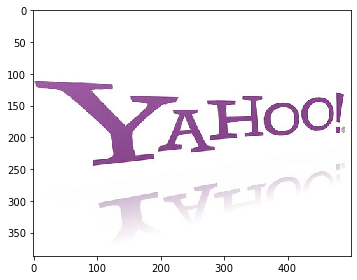

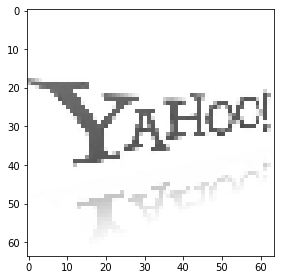

Initial Dimensions :  (60, 232, 3)
After Dimensions :  (4096,)
Brand: Yahoo


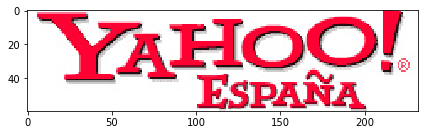

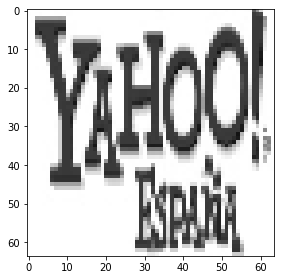

Initial Dimensions :  (70, 279, 3)
After Dimensions :  (4096,)
Brand: Yahoo


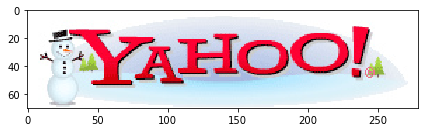

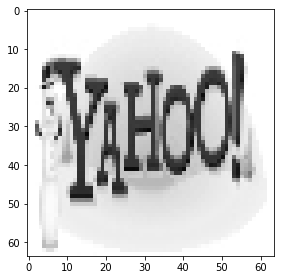

Initial Dimensions :  (375, 500, 3)
After Dimensions :  (4096,)
Brand: Yahoo


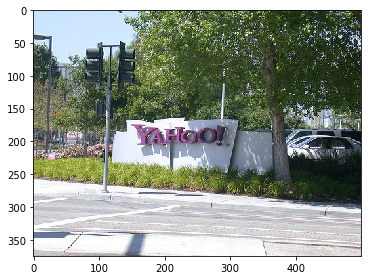

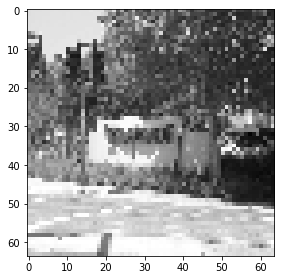

Initial Dimensions :  (203, 500, 3)
After Dimensions :  (4096,)
Brand: Yahoo


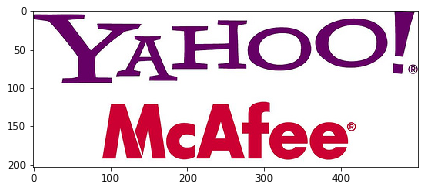

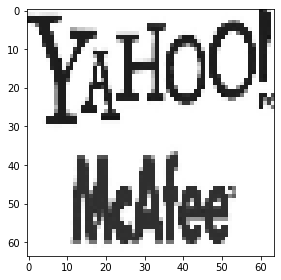

Initial Dimensions :  (245, 350, 3)
After Dimensions :  (4096,)
Brand: Yahoo


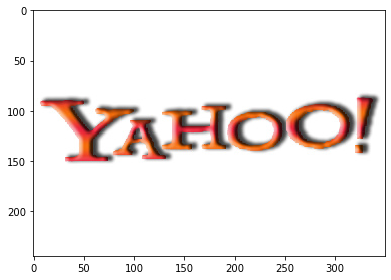

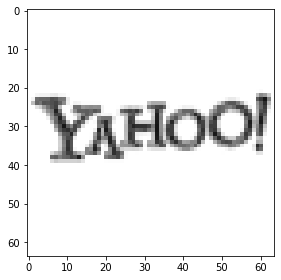

Initial Dimensions :  (64, 500, 3)
After Dimensions :  (4096,)
Brand: Yahoo


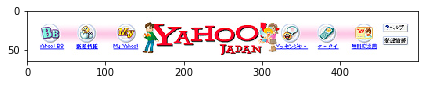

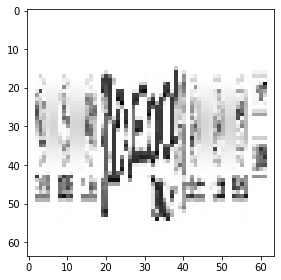

In [61]:
#Logos2
width = 64
height = 64
dim = (width, height)
listImg=[]
listImgArr=[]
listClass=[]

data_logos=img_class.to_numpy()
img_logo_a=data_logos[0]
lab_logo_a=data_logos[1]
n_sample=len(img_class)

print('WHATS HAPPENING WITH THE IMAGES')
for i in range(len(img_class)) : 
    
    #Classification / Label
    classif=img_class.loc[i, "Brand"]
    
    #Path
    path=img_class.loc[i, "NameFile"]
    #print(path)
    #Got image from path
    image = io.imread(path)

    #Convert to Gray and Array
    arr_gray=color.rgb2gray(image) 


    #Reshape 64x64
    arr_gray_re=cv2.resize(arr_gray, dim)
    #print('After Dimensions : ',np.shape(arr_gray_re.flatten()))
    
    #Append Lists
    listImg.append([arr_gray_re,classif])
    listClass.append(classif)
    listImgArr.append([arr_gray_re.flatten(),classif])
        
    
    if i > 2827 :
        print('Initial Dimensions : ',image.shape)
        print('After Dimensions : ',np.shape(arr_gray_re.flatten()))
        print("Brand: "+ str(classif))
        io.imshow(image)
        plt.show()
        io.imshow(arr_gray_re)     
        plt.show()
        
        
#print(listImg)
#print(listClass)


In [53]:
k2=2835
df_LogoI=pd.DataFrame(listImgArr, columns=['image','classif'])
df_infoLogo=df_LogoI.groupby('classif').count()
df_infoLogo.reset_index(inplace=True)
df_infoLogo.rename(columns={'image':'count'}, inplace=True)
df_infoLogo['percentage']= round((df_infoLogo['count']*100)/k2,2)
#print(df_infoLogo)
#print('Sum of the porcentage: '+str(df_infoLogo.percentage.sum()))

In [65]:
listImg=pd.DataFrame(listImg, columns=['image','classif'])

# 2. Sampling and SVM 

In [43]:

xl=list(df_LogoI['image'])
yl=list(df_LogoI['classif'])

print("Information Array\n")
xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.2, random_state=42)
print('Train size: '+str(len(yl_train)))
print('Test size: '+str(len(yl_test)))

xIl=list(listImg['image'])
yIl=list(listImg['classif'])

print("\nInformation Image\n")
x_trainIl, x_testIl, y_trainIl, y_testIl = train_test_split(xIl, yIl, test_size=0.2, random_state=42)
print('Train size: '+str(len(y_trainIl)))
print('Test size: '+str(len(y_testIl)))

Information Array

Train size: 2268
Test size: 567

Information Image

Train size: 2268
Test size: 567


In [44]:
#What do we have
print(xl_train[:1])
print(yl_train[:1])

[array([1., 1., 1., ..., 1., 1., 1.])]
['Yahoo']


In [45]:
#Fitting the model
yl_train=np.array(yl_train)#.to_numpy()#converting to array
xl_train=np.array(xl_train)#.to_numpy()#Converting to array
print(np.shape(yl_train))
print(np.shape(xl_train))
model_svmLogo = svm.SVC(kernel='linear', C=1.0, random_state=0)
model_svmLogo.fit(xl_train, yl_train)

(2268,)
(2268, 4096)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
#Predict the values with test data
expectedl = yl_test
predictedl= model_svmLogo.predict(xl_test)


In [49]:
#How did we do?
aScoreSVMLogo=accuracy_score(yl_test, predictedl)
print('Accuracy of Model SVM1:',aScoreSVMLogo)
#Not too bad!

Accuracy of Model SVM1: 0.9488536155202821


In [50]:
#Their must be at least on incorrect prediction
(yl_test!=predictedl).any()

True

## 3. Show results

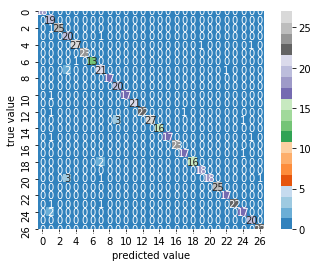

In [51]:
#Confusion Matrix. 

matl = confusion_matrix(yl_test, predictedl)

sns.heatmap(matl, square=True, annot=True, cbar=True, cmap="tab20c")
plt.xlabel('predicted value')
plt.ylabel('true value');


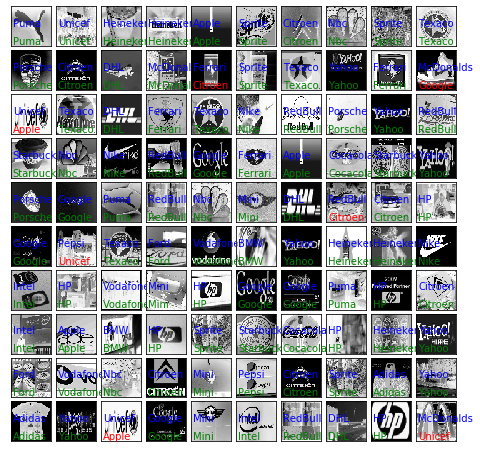

In [52]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

#test_images = x_testI.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_testIl[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.5, yl_test[i], transform=ax.transAxes,color='blue')
    ax.text(0.05, 0.05,predictedl[i],
            transform=ax.transAxes,
            color='green' if (yl_test[i] == predictedl[i]) else 'red')
